## Checkpoint 1: Data Cleaning 1

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline                  # Without this line, "plt.show()" is needed at the end of every plotting commands


UsageError: unrecognized arguments: # Without this line, "plt.show()" is needed at the end of every plotting commands


In [2]:
# Load the data in rounds2.csv file to rounds2 dataframe
rounds2 = pd.read_csv("rounds2.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 25: invalid start byte

In [3]:
# Load the data in companies.csv file to companies dataframe
companies = pd.read_csv("companies.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 25: invalid start byte

In [4]:
# Chardet: The Universal Character Encoding Detector ; This import is needed to find the encoding of the file.
import chardet

In [5]:
# Identify the coding of the csv files
for filename in ("companies.csv", "rounds2.csv"):
  with open(filename, 'rb') as rawdata:
    result = chardet.detect(rawdata.read())
    print(filename, result)                    # Print the encoding of the file

companies.csv {'encoding': 'Windows-1254', 'confidence': 0.4610845903762258, 'language': 'Turkish'}
rounds2.csv {'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}


In [7]:
# Load the data from csv files into dataframe
companies = pd.read_csv("companies.csv", encoding='Windows-1254')
rounds2 = pd.read_csv("rounds2.csv", encoding='Windows-1254')

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9e in position 125658: character maps to <undefined>

In [8]:
# After analyzing different encodings, chosen palmos as the right encoding
companies = pd.read_csv("companies.csv", encoding='palmos')
rounds2 = pd.read_csv("rounds2.csv", encoding='palmos')

In [9]:
# Verify the sample data in rounds2 dataframe
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [10]:
# Verify the sample data in companies dataframe
companies.sample(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
41283,/Organization/Optimov,Optimov,http://optimov.com/en/,Fitness,operating,DNK,17,Frederiksberg,Frederiksberg,NaN
32922,/Organization/Locaii,PetPartner,http://www.petpartnerapp.com,Apps|Mobile|Pets|SaaS,operating,USA,CA,San Diego,San Diego,10-03-2011
46462,/Organization/Quibb,Quibb,http://quibb.com,Creative Industries|News|Professional Networking,operating,USA,CA,SF Bay Area,San Francisco,01-01-2013


In [11]:
# Change the data to proper case to find unique values in name and permalinks columns of companies dataframe
companies["name"] = companies["name"].str.title()
companies["permalink"] = companies["permalink"].str.lower()

# Remove spaces to find unique values in name and permalinks columns of companies dataframe
companies["name"] = companies["name"].str.strip()
companies["permalink"] = companies["permalink"].str.strip()

companies.sample(3)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
3552,/organization/apieron,Apieron,http://www.apieron.com,Biotechnology|Health Care|Medical Devices,closed,USA,CA,SF Bay Area,Menlo Park,01-01-2001
46730,/organization/radialogica,Radialogica,http://www.radialogica.com,Software,operating,USA,MO,MO - Other,Clarkton,01-01-2011
45931,/organization/pure-networks,Pure Networks,http://www.purenetworks.com,Web Hosting,acquired,USA,WA,Seattle,Seattle,01-01-2002


In [10]:
# Change the data to proper case and remove spaces to find unique values in company_permalink column of rounds2 dataframe.
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
companies["name"] = companies["name"].str.strip()
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [11]:
# Change the column name of permalink in companies to match the column name in rounds2 dataFrame
companies.rename(columns={"permalink": "company_permalink"}, inplace=True)
companies.sample(3)

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
20313,/organization/filecubed,Filecubed,http://www.filecubed.co,Curated Web|Design|File Sharing|User Experienc...,closed,NaN,NaN,NaN,NaN,01-01-2012
62236,/organization/visibiz,Visibiz,http://www.visibiz.com,CRM|Social Media|Software,closed,USA,PA,Philadelphia,Philadelphia,01-01-2010
44939,/organization/premonix,Premonix,http://www.premonix.com,Analytics,operating,USA,CA,Los Angeles,Santa Monica,01-06-2011


In [12]:
#Details of companies
print("companies shape", companies.shape, sep=" : ", end = "\n\n")

print("companies name details", companies["name"].describe(), sep=" : \n", end = "\n\n")

print("companies permalink details", companies["company_permalink"].describe(), sep=" : \n")

companies shape : (66368, 10)

companies name details : 
count     66367
unique    66034
top       Spire
freq          4
Name: name, dtype: object

companies permalink details : 
count                           66368
unique                          66368
top       /organization/groovychannel
freq                                1
Name: company_permalink, dtype: object


In [13]:
# print the duplicates in name column of companies dataframe

company_names = companies["name"]
companies[company_names.isin(company_names[company_names.duplicated()])]

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
281,/organization/3divaz-2,3Divaz,http://www.3divaz.ch/Home,NaN,closed,NaN,NaN,NaN,NaN,01-07-2014
282,/organization/3divaz-3,3Divaz,http://www.3divaz.ch/Home,NaN,operating,CHE,1,CHE - Other,Wildegg,01-07-2014
1526,/organization/adtena,Adtena,http://adtena.com/,Ad Targeting|Advertising|Mobile Advertising,operating,NaN,NaN,NaN,NaN,NaN
1527,/organization/adtena-2,Adtena,http://adtena.com,NaN,closed,NaN,NaN,NaN,NaN,15-11-2014
1995,/organization/agora-3,Agora,http://www.agora.io/,Mobile|Mobile Software Tools|VoIP,operating,USA,CA,SF Bay Area,Palo Alto,01-01-2014
...,...,...,...,...,...,...,...,...,...,...
65799,/organization/zenpayroll,Gusto,https://gusto.com/,Financial Services|Personal Finance|Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2011
65897,/organization/zesty,Zesty,http://www.zesty.co.uk,Curated Web|Health Care|Healthcare Services|On...,operating,GBR,H9,London,London,01-05-2013
65899,/organization/zestyapp,Zesty,http://www.zesty.com/,Health and Wellness|Logistics|Organic Food|Spe...,operating,USA,CA,SF Bay Area,San Francisco,04-11-2013
66028,/organization/zingbox,Zingbox,http://www.zingbox.com/,Leisure|Music|Music Services,operating,USA,CA,SF Bay Area,Mountain View,NaN


In [14]:
# Number of companies with closed status in companies dataframe
companies[companies['status'].str.lower() == 'closed'].shape

(6238, 10)

In [15]:
# shape of rounds2 dataframe
rounds2.shape

(114949, 6)

In [16]:
# Merge rounds2 and companies dataframes using company_permalink column
master_frame = pd.merge(rounds2, companies, how="inner", on="company_permalink")
master_frame.sample(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
28904,/organization/draftkings,/funding-round/605e7d00d34fd7f79a0565152b20ee08,venture,C,25-08-2014,41000000.0,Draftkings,http://www.draftkings.com,Fantasy Sports|Games|Sports,operating,USA,MA,Boston,Boston,01-01-2011
108086,/organization/vitrue,/funding-round/5f1914ad318c643229db26388b6251a9,venture,C,17-02-2011,17000000.0,Vitrue,http://www.vitrue.com,Advertising|Enterprise Software|Sales and Mark...,acquired,USA,GA,Atlanta,Atlanta,01-05-2006
12349,/organization/biomimetic-therapeutics,/funding-round/92af9a6a78b8672b9e80d50722e41c8b,venture,C,05-11-2004,25700000.0,Biomimetic Therapeutics,http://www.biomimetics.com,Biotechnology,ipo,USA,TN,Nashville,Franklin,01-01-1999


In [17]:
# Get info on master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   name                     114948 non-null  object 
 7   homepage_url             108815 non-null  object 
 8   category_list            111539 non-null  object 
 9   status                   114949 non-null  object 
 10  country_code             106271 non-null  object 
 11  state_code               104003 non-null  object 
 12  region                   104782 non-null  object 
 13  city                     104785 non-null  object 
 14  foun

In [18]:
# Unique companies in rounds2 dataframe. This is equal to the unique company names in 
# master_frame as there are same number of records in rounds2 and master_frame.

master_frame["name"].nunique()

66034

## Checkpoint 2: Funding Type Analysis

In [19]:
master_frame.shape

(114949, 15)

In [20]:
# Check the null values in master_frame
master_frame.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [21]:
# Look at the record where name is null
master_frame[master_frame['name'].isna()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
98692,/organization/tell-it-in,/funding-round/9c987e616755a78c51a4aa67c27a2a93,seed,NaN,01-03-2012,25000.0,NaN,http://tellitin10.com,Startups,closed,USA,OR,"Portland, Oregon",Portland,01-10-2011


In [22]:
# Remove the row from master_frame where name is null
master_frame = master_frame[~master_frame['name'].isna()]
master_frame.shape

(114948, 15)

In [23]:
# Explain raised_amount_usd column in master_frame
master_frame['raised_amount_usd'].describe()

count    9.495800e+04
mean     1.042698e+07
std      1.148218e+08
min      0.000000e+00
25%      3.226042e+05
50%      1.680521e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [24]:
# Get the count of funding_round_type where raised_amount_usd is null
master_frame[master_frame['raised_amount_usd'].isna()]\
.groupby("funding_round_type")['company_permalink'].count()

funding_round_type
angel                    1234
convertible_note          370
debt_financing            213
equity_crowdfunding      2029
grant                      76
non_equity_assistance     118
post_ipo_equity            10
private_equity            349
product_crowdfunding       24
secondary_market           65
seed                     6921
undisclosed              3315
venture                  5266
Name: company_permalink, dtype: int64

In [25]:
# Get the count of funding_round_type where raised_amount_usd is not null
master_frame[~master_frame['raised_amount_usd'].isna()]\
.groupby("funding_round_type")['company_permalink'].count()

funding_round_type
angel                     4860
convertible_note          1447
debt_financing            6682
equity_crowdfunding       1228
grant                     2124
non_equity_assistance       73
post_ipo_debt              152
post_ipo_equity            628
private_equity            1936
product_crowdfunding       386
secondary_market            30
seed                     23602
undisclosed               1582
venture                  50228
Name: company_permalink, dtype: int64

In [26]:
master_frame = master_frame[~master_frame['raised_amount_usd'].isna()]
master_frame.shape

(94958, 15)

In [27]:
# Explain funding_round_type column in master_frame
master_frame['funding_round_type'].describe()

count       94958
unique         14
top       venture
freq        50228
Name: funding_round_type, dtype: object

In [28]:
# Get unique valuues of funding_round_type column in a sorted fashion
np.sort(master_frame['funding_round_type'].unique())

array(['angel', 'convertible_note', 'debt_financing',
       'equity_crowdfunding', 'grant', 'non_equity_assistance',
       'post_ipo_debt', 'post_ipo_equity', 'private_equity',
       'product_crowdfunding', 'secondary_market', 'seed', 'undisclosed',
       'venture'], dtype=object)

In [29]:
# Verify whether there is any null data in funding_round_type column
master_frame['funding_round_type'].isnull().sum()

0

In [30]:
# Get the raised_amount_usd across each funding_round_type
master_frame.groupby("funding_round_type")["raised_amount_usd"].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.0,9.586945e+05,7.404397e+06,0.0,150000.00,400000.0,1000000.0,4.945120e+08
convertible_note,1447.0,1.453439e+06,8.043846e+06,0.0,78847.50,272000.0,1000000.0,1.850483e+08
debt_financing,6682.0,1.704353e+07,2.803204e+08,0.0,330484.25,1100000.0,4000000.0,2.127194e+10
equity_crowdfunding,1228.0,5.383682e+05,1.719329e+06,0.0,7000.00,100000.0,395901.0,2.740000e+07
grant,2124.0,4.300576e+06,2.558742e+07,0.0,50000.00,201684.0,1700000.0,7.500000e+08
non_equity_assistance,73.0,4.112031e+05,1.771747e+06,0.0,25000.00,60000.0,125000.0,1.500000e+07
post_ipo_debt,152.0,1.687046e+08,6.024738e+08,70000.0,4000000.00,19950000.0,60000000.0,5.800000e+09
post_ipo_equity,628.0,8.218249e+07,4.691889e+08,77.0,3764794.00,12262852.5,40000000.0,1.066494e+10
private_equity,1936.0,7.330859e+07,1.981135e+08,0.0,5000000.00,20000000.0,75000000.0,4.745460e+09


In [31]:
# Change the format of values so that they display with commas and not in exponential format
pd.options.display.float_format = '{:,.0f}'.format

# Display the master_frame grouped by funding_round_type sorted by median.
master_frame.groupby("funding_round_type")["raised_amount_usd"].describe().sort_values(by="50%")


,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
non_equity_assistance,73,"411,203","1,771,747",0,"25,000","60,000","125,000","15,000,000"
equity_crowdfunding,"1,228","538,368","1,719,329",0,"7,000","100,000","395,901","27,400,000"
product_crowdfunding,386,"1,363,131","4,698,380",0,"40,242","183,915","735,000","52,000,000"
grant,"2,124","4,300,576","25,587,424",0,"50,000","201,684","1,700,000","750,000,000"
convertible_note,"1,447","1,453,439","8,043,846",0,"78,848","272,000","1,000,000","185,048,285"
seed,"23,602","719,847","2,221,775",0,"55,000","275,000","1,000,000","200,000,000"
angel,"4,860","958,694","7,404,397",0,"150,000","400,000","1,000,000","494,511,992"
undisclosed,"1,582","19,242,370","199,323,809",0,"220,000","1,018,680","4,848,804","5,000,000,000"
debt_financing,"6,682","17,043,526","280,320,357",0,"330,484","1,100,000","4,000,000","21,271,935,000"


In [32]:
# Create a dataframe where raised_amount_usd is between 5-15M and sort by count descending

master_frame[(master_frame["raised_amount_usd"]>=5_000_000) &\
             (master_frame["raised_amount_usd"]<=15_000_000)].groupby("funding_round_type")\
["raised_amount_usd"].describe().sort_values(by="count", ascending=False)

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
venture,"16,598","8,888,551","3,060,399","5,000,000","6,000,000","8,269,594","11,000,000","15,000,000"
debt_financing,870,"8,283,572","3,072,382","5,000,000","5,604,250","7,500,000","10,000,000","15,000,000"
private_equity,429,"9,283,496","3,140,014","5,000,000","6,250,000","9,469,746","11,999,997","15,000,000"
undisclosed,226,"8,499,421","2,926,151","5,000,000","6,000,000","8,000,000","10,000,000","15,000,000"
seed,203,"6,610,420","2,107,430","5,000,000","5,000,000","6,000,000","7,050,000","15,000,000"
grant,173,"8,546,105","2,769,451","5,000,000","6,000,000","8,100,000","10,000,000","15,000,000"
post_ipo_equity,152,"9,324,945","2,850,843","5,000,000","6,710,274","9,276,438","11,700,000","15,000,000"
angel,72,"7,212,355","2,421,091","5,000,000","5,015,000","6,500,000","8,908,096","15,000,000"
convertible_note,48,"8,071,730","3,298,569","5,000,000","5,190,780","6,925,436","9,886,568","15,000,000"


In [33]:
# Create a dataframe filtered for only 'venture' funding_round_types
venture_frame = master_frame[master_frame["funding_round_type"] == "venture"]
venture_frame.sample(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
110352,/organization/wheelright,/funding-round/c58c1e5f113beee4774b732e5c4a8c48,venture,NaN,30-07-2014,"4,240,774",Wheelright,http://wheelright.co.uk,Logistics|Sensors|Supply Chain Management|Tech...,operating,GBR,K2,London,Oxford,01-01-2004
32841,/organization/esight,/funding-round/b2f8444b8519c7823c36ca96254d5e99,venture,NaN,04-05-2015,"562,631",Esight,http://www.esighteyewear.com,Hardware + Software|Wearables,operating,CAN,ON,Ottawa,Ottawa,01-01-2006
77791,/organization/predixion-software,/funding-round/775c475953cad6018ff298bace47f3f3,venture,D,27-04-2015,"4,025,000",Predixion Software,http://predixionsoftware.com,Software,operating,USA,CA,"Orange County, California",San Juan Capistrano,01-01-2009


In [34]:
# Get info about venture frame

venture_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50228 entries, 0 to 114941
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        50228 non-null  object 
 1   funding_round_permalink  50228 non-null  object 
 2   funding_round_type       50228 non-null  object 
 3   funding_round_code       28043 non-null  object 
 4   funded_at                50228 non-null  object 
 5   raised_amount_usd        50228 non-null  float64
 6   name                     50228 non-null  object 
 7   homepage_url             47620 non-null  object 
 8   category_list            49726 non-null  object 
 9   status                   50228 non-null  object 
 10  country_code             48111 non-null  object 
 11  state_code               47367 non-null  object 
 12  region                   47515 non-null  object 
 13  city                     47515 non-null  object 
 14  founded_at           

## Checkpoint 3: Country Analysis

In [35]:
# Get the null values info in each column of venture_frame
venture_frame.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         22185
funded_at                      0
raised_amount_usd              0
name                           0
homepage_url                2608
category_list                502
status                         0
country_code                2117
state_code                  2861
region                      2713
city                        2713
founded_at                  9631
dtype: int64

In [36]:
# Get the country_code frequency in venture_frame
venture_frame['country_code'].value_counts()

USA    36139
GBR     2055
CHN     1564
CAN     1256
FRA      917
       ...  
KNA        1
GTM        1
GGY        1
LAO        1
PAN        1
Name: country_code, Length: 97, dtype: int64

In [37]:
# Get the normalized country_code frequency in venture_frame
venture_frame['country_code'].value_counts(normalize=True)*100

USA   75
GBR    4
CHN    3
CAN    3
FRA    2
      ..
KNA    0
GTM    0
GGY    0
LAO    0
PAN    0
Name: country_code, Length: 97, dtype: float64

In [38]:
# Check the data where country_code is null in venture_frame
venture_frame[venture_frame['country_code'].isna()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878","(The) One Of Them,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
95,/organization/1234enter,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,NaN,22-11-2013,"150,267",1234Enter,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012
100,/organization/123greetings,/funding-round/5dd1821a92088ff96b467eb16431731a,venture,NaN,23-07-2015,"5,400,000",123Greetings,http://www.123greetings.com/,Internet,operating,NaN,NaN,NaN,NaN,01-05-1997
133,/organization/17-media,/funding-round/f8ffde9fa822843ac6ea9b66cc615df1,venture,A,05-11-2015,"10,000,000",17 Media,http://17.media,NaN,operating,NaN,NaN,NaN,NaN,15-07-2015
145,/organization/1800diapers,/funding-round/5e2b8cd8ad0dcdff961fd09dee78d487,venture,B,04-12-2007,"7,000,000",1800Diapers,NaN,Baby Accessories|Kids,operating,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114450,/organization/zkey-com,/funding-round/aca95e6dda1b354ebee80bca5f261607,venture,B,22-11-1999,"10,000,000",Zkey.Com,http://zkey.com/,NaN,closed,NaN,NaN,NaN,NaN,NaN
114453,/organization/zlango,/funding-round/203baf1c533923de0bc50699a12f447e,venture,A,12-02-2007,"12,000,000",Zlango,http://www.zlango.com,NaN,closed,NaN,NaN,NaN,NaN,NaN
114512,/organization/zolk-c,/funding-round/327f2828712fa42899d272320ec31be6,venture,NaN,13-01-2012,"636,731",Zolk C,http://www.zolkc.com,Games|Mobile,operating,NaN,NaN,NaN,NaN,01-11-2007
114646,/organization/zootcard,/funding-round/c662b7cb18f7be11f811cc9c5b504bb6,venture,NaN,26-06-2014,"750,000",Zootcard,http://www.zootcard.com,Curated Web,operating,NaN,NaN,NaN,NaN,01-06-2012


In [39]:
# Check the data of state_code, region and city when country_code is null
venture_frame[venture_frame['country_code'].isna()][['state_code','region','city']].describe()

,state_code,region,city
count,0,0,0
unique,0,0,0
top,NaN,NaN,NaN
freq,NaN,NaN,NaN


In [40]:
# Remove the countries where country code is null
venture_frame = venture_frame[~venture_frame['country_code'].isna()]
venture_frame.shape

(48111, 15)

In [41]:
# Create a dataframe to get top 9 countries  sorted by sum of raised_amount_usd
venture_frame_grpd = venture_frame[(venture_frame["raised_amount_usd"]>=5_000_000) &\
             (venture_frame["raised_amount_usd"]<=15_000_000)].groupby('country_code').agg({'raised_amount_usd': ['sum','count']})  # group the venture_frame by countries 
venture_frame_grpd.columns = venture_frame_grpd.columns.droplevel(0)                   # drop the top level column
venture_frame_grpd.reset_index(inplace=True)                                           # reset the index so that countries become a column rather than index
venture_frame_grpd = venture_frame_grpd.sort_values(by="sum", ascending=False).head(9) # get the top 9 countries
venture_frame_grpd


,country_code,sum,count
71,USA,"108,531,347,515",12150
25,GBR,"5,436,843,539",628
14,CHN,"5,016,561,053",533
11,CAN,"3,647,009,578",426
31,IND,"2,976,543,602",330
34,ISR,"2,840,305,951",323
24,FRA,"2,112,425,453",251
18,DEU,"1,765,026,223",203
64,SWE,"655,040,681",77


In [42]:
# Read wikipedia to get the countries that have English as official language
from urllib import request
import ssl

url="https://example.com/data.html"
context = ssl._create_unverified_context()
url = "https://www.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language#Sovereign_states"
response = request.urlopen(url, context=context)
html = response.read()

wiki_data = pd.read_html(html)

# Read the data from different dataframes obtained after reading from wikipedia
english_countries_wiki = pd.concat([wiki_data[0],wiki_data[1],wiki_data[2]])
english_countries_wiki.reset_index(inplace=True)

In [43]:
# Filter the countries in the dataframe based on the data from wikipedia and get the top 3 countries
top_en_countries = venture_frame_grpd[venture_frame_grpd['country_code'].apply(lambda x : x.strip()  in english_countries_wiki['Alpha-3 code'].values)].head(3)
top_en_countries


,country_code,sum,count
71,USA,"108,531,347,515",12150
25,GBR,"5,436,843,539",628
11,CAN,"3,647,009,578",426


In [44]:
# properly rank the top 3 coutries by resetting the index
top_en_countries.reset_index(drop=True, inplace=True)
top_en_countries

,country_code,sum,count
0,USA,"108,531,347,515",12150
1,GBR,"5,436,843,539",628
2,CAN,"3,647,009,578",426


In [45]:
# Filter the venture countries with top 3 english speaking couties and create a new data frame
top_en_venture_countries = venture_frame[venture_frame['country_code'] \
                                         .apply(lambda x : x in top_en_countries['country_code'].values)]
top_en_venture_countries

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,"719,491",Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,"20,000,000",H2O.Ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,"1,700,000",H2O.Ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,"8,900,000",H2O.Ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,"5,000,000",1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114920,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,"12,000,000",Zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114922,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,"14,219,999",Zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,"555,016",Zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,"140,500",Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN


In [46]:
# Verify the countries in the final list
top_en_venture_countries['country_code'].value_counts()

USA    36139
GBR     2055
CAN     1256
Name: country_code, dtype: int64

## Checkpoint 4: Sector Analysis 1

In [47]:
# Get the shape of top_en_venture_countries dataframe
top_en_venture_countries.shape

(39450, 15)

In [48]:
# Show the sum of null values in each column in the dataframe
top_en_venture_countries.isna().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         18161
funded_at                      0
raised_amount_usd              0
name                           0
homepage_url                1900
category_list                220
status                         0
country_code                   0
state_code                    75
region                       160
city                         160
founded_at                  6494
dtype: int64

In [49]:
# Check the null data in category_list of top_en_venture_countries dataframe
top_en_venture_countries[top_en_venture_countries["category_list"].isna()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
528,/organization/3pl-central,/funding-round/895e7a284b35bdf86103e52db8a630a6,venture,NaN,03-12-2015,"17,500,000",3Pl Central,http://3plcentral.com/,NaN,operating,USA,CA,Los Angeles,Manhattan Beach,01-01-2006
782,/organization/60frames-entertainment,/funding-round/60daf91c26dd8f3bd8cbb7d9c28ba9b6,venture,A,02-08-2007,"3,500,000",60Frames Entertainment,http://60frames.com/,NaN,closed,USA,CA,Los Angeles,Beverly Hills,NaN
1430,/organization/accelerator-corp,/funding-round/215f281607a54b9d5fc848b5c74ef9e7,venture,NaN,22-05-2003,"15,000,000",Accelerator Corp.,http://www.acceleratorcorp.com,NaN,operating,USA,WA,Seattle,Seattle,01-01-2003
1431,/organization/accelerator-corp,/funding-round/bdca470b4ae21074297ad9da55e11dbf,venture,C,03-08-2007,"22,500,000",Accelerator Corp.,http://www.acceleratorcorp.com,NaN,operating,USA,WA,Seattle,Seattle,01-01-2003
1432,/organization/accelerator-corp,/funding-round/d1341bc6df5065519b7b399ac9a67823,venture,NaN,19-11-2004,"11,800,000",Accelerator Corp.,http://www.acceleratorcorp.com,NaN,operating,USA,WA,Seattle,Seattle,01-01-2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111962,/organization/xbux,/funding-round/7dac109a4c5cb8eab32b27cd3594b09c,venture,B,08-05-2007,"2,000,000",Xbux,NaN,NaN,operating,USA,CA,SF Bay Area,Belmont,NaN
112403,/organization/xshares-group-llc,/funding-round/078473e9b20f414cf1a4ffada366eb83,venture,NaN,02-02-2007,"10,000,000",Xshares Group Llc,http://www.xsharesadvisors.com,NaN,operating,USA,NY,New York City,New York,NaN
112785,/organization/yellowjacket,/funding-round/e8a4037e2a35175aac61cd3c3153eb7e,venture,NaN,09-08-2007,"1,250,000",Yellowjacket,http://www.yjenergy.com,NaN,closed,USA,NY,New York City,New York,NaN
112951,/organization/yodel,/funding-round/cd2b175af6d20770079461335d2cf44e,venture,A,02-06-2005,"8,000,000",Yodel,NaN,NaN,closed,USA,CA,SF Bay Area,San Francisco,NaN


In [50]:
# Remove the rows having null values in category_list of top_en_venture_countries dataframe
top_en_venture_countries = top_en_venture_countries[~top_en_venture_countries["category_list"].isna()]
top_en_venture_countries.shape

(39230, 15)

In [51]:
# Check the frequency of category_list in the dataframe
top_en_venture_countries["category_list"].value_counts()

Biotechnology                                                                                             4781
Software                                                                                                  3328
Health Care                                                                                               1235
Clean Technology                                                                                          1081
Enterprise Software                                                                                       1045
                                                                                                          ... 
Advertising|Analytics|Big Data|Business Intelligence|Enterprise Software|Fraud Detection|SaaS|Security       1
Android|App Marketing|iPhone|Mobile|Mobile Advertising|Monetization                                          1
Biotechnology|Clinical Trials                                                                                1
A

In [52]:
# Check the number of unique values of category_list in the dataframe
top_en_venture_countries["category_list"].nunique()

7881

In [53]:
# Create a new column called primary_category showing the first category of category_list in lower case 

top_en_venture_countries = top_en_venture_countries.assign(primary_category=lambda x : x['category_list'])
top_en_venture_countries["primary_category"] = top_en_venture_countries["primary_category"].apply(lambda x : x.split("|")[0].strip().lower())
top_en_venture_countries

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,"719,491",Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,"20,000,000",H2O.Ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,"1,700,000",H2O.Ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,"8,900,000",H2O.Ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,"5,000,000",1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114920,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,"12,000,000",Zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,biotechnology
114922,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,"14,219,999",Zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,biotechnology
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,"555,016",Zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,biotechnology
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,"140,500",Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,e-commerce


In [54]:
print("Unique Values", top_en_venture_countries["primary_category"].nunique())
top_en_venture_countries["primary_category"].value_counts()

Unique Values 565


biotechnology                   6047
software                        3440
advertising                     1877
enterprise software             1605
health care                     1603
                                ... 
enterprise security                1
translation                        1
anything capital intensive         1
kids                               1
enterprise resource planning       1
Name: primary_category, Length: 565, dtype: int64

In [55]:
# Read the mapping file and show few sample data records in that dataframe
mapping = pd.read_csv("mapping.csv")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [56]:
# Get the shape of mapping file
mapping.shape

(688, 10)

In [57]:
# Remove rows with null values in category_list
mapping = mapping[~mapping["category_list"].isna()]
mapping.shape

(687, 10)

In [58]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [59]:
# convert the mapping dataframe from wide format to long format

value_vars = list(mapping.columns[1:])         # store the value variables in one Series

# take the setdiff() to get the rest of the variables
id_vars = list(np.setdiff1d(mapping.columns, value_vars))

mapping_long_df = pd.melt(mapping, id_vars = id_vars, value_vars = value_vars)
mapping_long_df = mapping_long_df[mapping_long_df["value"] == 1].drop("value",axis=1)
mapping_long_df

,category_list,variable
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising"
6113,Social Television,"Social, Finance, Analytics, Advertising"
6114,Social Travel,"Social, Finance, Analytics, Advertising"
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [60]:
# rename columns in modified mapping dataframe
mapping_long_df.rename(columns={"category_list": "primary_category", "variable": "sector"}, inplace=True)

# Get different sectors in mapping
mapping_long_df["sector"].value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Name: sector, dtype: int64

In [61]:
# Show different categories in mapping
mapping_long_df["primary_category"].value_counts()

Demographies          1
Mobile Social         1
All Markets           1
Career Planning       1
Cloud-Based Music     1
                     ..
Fuel Cells            1
Fmcg                  1
Internet Marketing    1
E-Commerce            1
Systems               1
Name: primary_category, Length: 687, dtype: int64

In [62]:
# Replace '0' with 'na', strip the additional spaces and change the categories to lower case
mapping_long_df["primary_category"] = mapping_long_df["primary_category"].apply(lambda x : x.replace("0","na").lower().strip())

In [63]:
mapping_long_df["primary_category"].unique()

array(['adventure travel', 'aerospace', 'auto', 'automated kiosk',
       'automotive', 'bicycles', 'boating industry', 'cad', 'cars',
       'design', 'designers', 'drones', 'electric vehicles', 'fuels',
       'heavy industry', 'industrial automation', 'limousines', 'soccer',
       'sporting goods', 'sports', 'transportation',
       'unmanned air systems', 'air pollution control', 'aquaculture',
       'bio-pharm', 'biofuels', 'bioinformatics',
       'biomass power generation', 'biometrics', 'biotechnology',
       'bitcoin', 'carbon', 'chemicals', 'clean energy',
       'clean technology', 'clean technology it', 'commercial solar',
       'commodities', 'concentrated solar power', 'disruptive models',
       'early-stage technology', 'energy', 'energy efficiency',
       'energy it', 'energy management', 'energy storage',
       'environmental innovation', 'fertility', 'fuel cells',
       'funeral industry', 'gas', 'green', 'green consumer goods',
       'home & garden', 'home a

In [64]:
# Merge rounds2 and companies dataframes using company_permalink column
top_en_ven_cnt_with_sectors = pd.merge(top_en_venture_countries, mapping_long_df, how="inner", on="primary_category")
top_en_ven_cnt_with_sectors.sample(3)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category,sector
13410,/organization/signaldemand,/funding-round/56d677b03dd950bbb0cb32abbaa6a5cc,venture,B,01-12-2005,"7,500,000",Signaldemand,http://www.signaldemand.com,Software,acquired,USA,CA,SF Bay Area,San Francisco,01-01-2004,software,Others
26983,/organization/vazata,/funding-round/e5e57389c2e7e011ec30cde749938bb1,venture,NaN,17-03-2014,"2,000,000",Vazata,http://www.vazata.com,Consulting|Enterprise Software,operating,USA,TX,Dallas,Plano,01-01-2000,consulting,"Social, Finance, Analytics, Advertising"
10033,/organization/neuralieve,/funding-round/29d2cfb911d6178b13482fc8d79491dc,venture,NaN,10-12-2010,"3,590,522",Neuralieve,http://www.neuralieve.com,Health Care,operating,USA,CA,SF Bay Area,Sunnyvale,01-01-2002,health care,Health


In [65]:
top_en_ven_cnt_with_sectors.shape


(39215, 17)

In [66]:
top_en_venture_countries.shape

(39230, 16)

In [67]:
# Get the values in top_en_venture_countries frame which are not present in mapping file
top_en_venture_countries[top_en_venture_countries['primary_category'].\
                         apply(lambda x : x not in mapping_long_df["primary_category"].values)]\
['primary_category'].unique()

array(['natural gas uses', 'enterprise 2.0', 'adaptive equipment',
       'racing', 'specialty retail', 'biotechnology and semiconductor',
       'rapidly expanding', 'product search', 'greentech', 'retirement'],
      dtype=object)

In [68]:
# Check the data in top_en_venture_countries frame which are not present in mapping file
top_en_venture_countries[top_en_venture_countries['primary_category'].\
                         apply(lambda x : x not in mapping_long_df["primary_category"].values)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category
20328,/organization/clean-vehicle-solutions,/funding-round/7b991c526219c2edff8789942215d93b,venture,NaN,26-02-2010,"125,000",Clean Vehicle Solutions,http://cleanvehiclesolutions.com,Natural Gas Uses|Service Providers|Services,operating,USA,NJ,Newark,East Brunswick,NaN,natural gas uses
22940,/organization/consensus-point,/funding-round/11ad1d209af6e06e87467f3432aa735f,venture,NaN,19-04-2011,"788,374",Consensus Point,http://www.consensuspoint.com,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,TN,Nashville,Nashville,01-01-2006,enterprise 2.0
22942,/organization/consensus-point,/funding-round/7cdac9335cdc78285e8dcd1932f8729b,venture,B,18-07-2012,"2,600,000",Consensus Point,http://www.consensuspoint.com,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,TN,Nashville,Nashville,01-01-2006,enterprise 2.0
28541,/organization/dolores-speech-products,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,NaN,07-04-2015,"250,000",Dolores Speech Products,http://doloresspeechproducts.com,Adaptive Equipment|Innovation Management|Speec...,operating,USA,MA,Boston,Wellesley,NaN,adaptive equipment
35278,/organization/fia-formula-e,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,NaN,15-05-2014,"68,569,234",Fia Formula E,http://www.fiaformulae.com/,Racing,closed,GBR,F1,GBR - Other,Hammersmith,01-01-2012,racing
36012,/organization/five-below,/funding-round/2a50c59492585ea4080fa67de755a442,venture,NaN,14-10-2010,"194,000,000",Five Below,http://www.fivebelow.com,Specialty Retail,ipo,USA,PA,Philadelphia,Philadelphia,NaN,specialty retail
36291,/organization/flexport,/funding-round/e890e1058ab6be04e9559cd34ee6382c,venture,A,06-08-2015,"20,000,000",Flexport,https://www.flexport.com/,Enterprise 2.0|Enterprise Software|Insurance|L...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2013,enterprise 2.0
43506,/organization/healthtell,/funding-round/8edf7332fface9972541807a248690b3,venture,A,13-06-2014,"9,486,929",Healthtell,http://www.healthtell.com,Biotechnology and Semiconductor|Diagnostics|He...,operating,USA,CA,SF Bay Area,San Ramon,01-01-2010,biotechnology and semiconductor
51816,/organization/justinmind,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,A,17-12-2007,"862,000",Justinmind,http://www.justinmind.com,Rapidly Expanding|Software|Usability|User Expe...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2007,rapidly expanding
70078,/organization/omega-point-research,/funding-round/4870743e3fded9317f5611eb2e848667,venture,NaN,14-05-2015,"3,172,815",Omega Point Research,NaN,Product Search,closed,USA,CA,SF Bay Area,Los Altos,01-01-2013,product search


In [69]:
# Check the number of sectors and their frequency in the dataframe
top_en_ven_cnt_with_sectors["sector"].value_counts()

Others                                     9153
Cleantech / Semiconductors                 8769
Social, Finance, Analytics, Advertising    7895
News, Search and Messaging                 4729
Health                                     3449
Manufacturing                              2675
Entertainment                              1982
Automotive & Sports                         563
Name: sector, dtype: int64

In [70]:
# Create a new dataframe to include the amounts between 5-15M range
top_en_ven_cnt_with_sectors_filtered = top_en_ven_cnt_with_sectors[(top_en_ven_cnt_with_sectors["raised_amount_usd"]>=5_000_000) &\
             (top_en_ven_cnt_with_sectors["raised_amount_usd"]<=15_000_000)].copy()
top_en_ven_cnt_with_sectors_filtered

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category,sector
6,/organization/22nd-century-group,/funding-round/50617d7ea8eaa838e2fd8eb8dfe06054,venture,NaN,18-09-2014,"10,000,000",22Nd Century Group,http://www.xxiicentury.com,Biotechnology,ipo,USA,NY,NY - Other,Clarence,01-01-1998,biotechnology,Cleantech / Semiconductors
11,/organization/23andme,/funding-round/97062e0d50c2955cbe40bf8220d87b08,venture,C,07-01-2011,"9,000,000",23Andme,http://23andme.com,Biotechnology|Search,operating,USA,CA,SF Bay Area,Mountain View,01-04-2006,biotechnology,Cleantech / Semiconductors
12,/organization/23andme,/funding-round/c27c1b420dfb34677a6ba449524f1c88,venture,B,18-06-2009,"12,600,000",23Andme,http://23andme.com,Biotechnology|Search,operating,USA,CA,SF Bay Area,Mountain View,01-04-2006,biotechnology,Cleantech / Semiconductors
14,/organization/23andme,/funding-round/f261366b4fbf1840ad71b20ea0d9c7ce,venture,A,03-10-2007,"9,000,000",23Andme,http://23andme.com,Biotechnology|Search,operating,USA,CA,SF Bay Area,Mountain View,01-04-2006,biotechnology,Cleantech / Semiconductors
16,/organization/3-v-biosciences,/funding-round/069e2f1ded2f499d232c3d7ec762c0e2,venture,NaN,17-03-2015,"14,278,567",3-V Biosciences,http://www.3vbio.com,Biotechnology,operating,USA,CA,SF Bay Area,Menlo Park,01-03-2007,biotechnology,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39198,/organization/wizrocket-technologies,/funding-round/195738852853780cc8f1220ba6fb761d,venture,A,03-08-2015,"8,000,000",Clevertap,https://clevertap.com/,Consumer Behavior|Mobile Analytics|SaaS,operating,USA,CA,SF Bay Area,Palo Alto,24-05-2013,consumer behavior,"Social, Finance, Analytics, Advertising"
39202,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,A,24-01-2001,"8,250,000",User Interface,http://www.userinterface.com,User Interface,operating,USA,CA,Bakersfield,California City,NaN,user interface,Others
39203,/organization/vector-watch,/funding-round/b010e14f723a45d5c8fadb5a857c620b,venture,NaN,25-11-2015,"5,000,000",Vector Watch,http://www.vectorwatch.com/,Watch|Wearables,operating,GBR,H9,London,London,01-01-2013,watch,Others
39204,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,A,09-06-2014,"10,500,000",Washio,http://www.getwashio.com,Service Industries,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,service industries,Others


In [71]:
# Get shape of the frame after filtering the countries, amount and investment type
top_en_ven_cnt_with_sectors_filtered.shape

(13106, 17)

In [72]:
# Get shape of the frame after filtering the countries and investment type but before filtering the amount
top_en_ven_cnt_with_sectors.shape

(39215, 17)

In [73]:
# Describe the raised_amount_usd values among top 3 countries
top_en_ven_cnt_with_sectors_filtered.groupby("country_code")["raised_amount_usd"].describe().sort_values(by="count", ascending=False)


,count,mean,std,min,25%,50%,75%,max
country_code,,,,,,,,
USA,"12,063","8,932,861","3,075,861","5,000,000","6,000,970","8,300,000","11,000,000","15,000,000"
GBR,621,"8,661,962","2,867,167","5,000,000","6,084,330","8,000,000","10,606,760","15,000,000"
CAN,422,"8,529,123","2,886,509","5,000,000","6,000,000","7,912,516","10,316,341","15,000,000"


In [74]:
# Pivot table for the top 3 countries across the sectors showing the sum and count of invested_amount
cntry_sector_pivot = top_en_ven_cnt_with_sectors_filtered.pivot_table(columns="country_code", index="sector", values="raised_amount_usd", aggfunc=['count', np.sum], margins=True)
cntry_sector_pivot.sort_values(('count','All'), ascending=False)


count                     \
country_code                              CAN  GBR    USA    All   
sector                                                             
All                                       422  621  12063  13106   
Others                                    109  147   2950   3206   
Social, Finance, Analytics, Advertising    78  133   2714   2925   
Cleantech / Semiconductors                112  130   2350   2592   
News, Search and Messaging                 46   73   1583   1702   
Health                                     21   24    909    954   
Manufacturing                              31   42    799    872   
Entertainment                              23   56    591    670   
Automotive & Sports                         2   16    167    185   

                                                  sum                \
country_code                                      CAN           GBR   
sector                                                                
All                                     3,599,289,960 5,379,078,691   
Others                                    926,137,962 1,283,624,289   
Social, Finance, Analytics, Advertising   656,143,075 1,089,404,014   
Cleantech / Semiconductors              1,015,887,607 1,163,990,056   
News, Search and Messaging                420,121,113   615,746,235   
Health                                    168,345,064   214,537,510   
Manufacturing                             237,633,071   361,940,335   
Entertainment                             160,022,068   482,784,687   
Automotive & Sports                        15,000,000   167,051,565   

                                                                         
country_code                                        USA             All  
sector                                                                   
All                                     107,757,097,294 116,735,465,945  
Others                                   26,321,007,002  28,530,769,253  
Social, Finance, Analytics, Advertising  23,807,376,964  25,552,924,053  
Cleantech / Semiconductors               21,633,430,822  23,813,308,485  
News, Search and Messaging               13,971,567,428  15,007,434,776  
Health                                    8,211,859,357   8,594,741,931  
Manufacturing                             7,258,553,378   7,858,126,784  
Entertainment                             5,099,197,982   5,742,004,737  
Automotive & Sports                       1,454,104,361   1,636,155,926

In [75]:
# Show only the top 3 sectors
cntry_sector_pivot_top3 = top_en_ven_cnt_with_sectors_filtered[(top_en_ven_cnt_with_sectors_filtered["sector"] == "Others")|
                                         (top_en_ven_cnt_with_sectors_filtered["sector"] == "Social, Finance, Analytics, Advertising")|
                                         (top_en_ven_cnt_with_sectors_filtered["sector"] == "Cleantech / Semiconductors")].pivot_table(columns="country_code", index="sector", values="raised_amount_usd", aggfunc=['count', np.sum], margins=True)

cntry_sector_pivot_top3.sort_values(('count','All'), ascending=False)


count                            sum  \
country_code                              CAN  GBR   USA   All           CAN   
sector                                                                         
All                                       299  410  8014  8723 2,598,168,644   
Others                                    109  147  2950  3206   926,137,962   
Social, Finance, Analytics, Advertising    78  133  2714  2925   656,143,075   
Cleantech / Semiconductors                112  130  2350  2592 1,015,887,607   

                                                                      \
country_code                                      GBR            USA   
sector                                                                 
All                                     3,537,018,359 71,761,814,788   
Others                                  1,283,624,289 26,321,007,002   
Social, Finance, Analytics, Advertising 1,089,404,014 23,807,376,964   
Cleantech / Semiconductors              1,163,990,056 21,633,430,822   

                                                        
country_code                                       All  
sector                                                  
All                                     77,897,001,791  
Others                                  28,530,769,253  
Social, Finance, Analytics, Advertising 25,552,924,053  
Cleantech / Semiconductors              23,813,308,485

In [76]:
# Pivot table for USA across the sectors showing the sum and count of invested_amount
us_pivot = top_en_ven_cnt_with_sectors_filtered[top_en_ven_cnt_with_sectors["country_code"]=='USA']\
.pivot_table(index="sector", values="raised_amount_usd", aggfunc=['count', np.sum], margins=True)

us_pivot.sort_values(('count','raised_amount_usd'), ascending=False)


<ipython-input-76-f36cb8ca66a6>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  us_pivot = top_en_ven_cnt_with_sectors_filtered[top_en_ven_cnt_with_sectors["country_code"]=='USA']\


,count,sum
,raised_amount_usd,raised_amount_usd
sector,,
All,12063,"107,757,097,294"
Others,2950,"26,321,007,002"
"Social, Finance, Analytics, Advertising",2714,"23,807,376,964"
Cleantech / Semiconductors,2350,"21,633,430,822"
"News, Search and Messaging",1583,"13,971,567,428"
Health,909,"8,211,859,357"
Manufacturing,799,"7,258,553,378"
Entertainment,591,"5,099,197,982"


In [77]:
# Pivot table for GBR across the sectors showing the sum and count of invested_amount
gb_pivot = top_en_ven_cnt_with_sectors_filtered[top_en_ven_cnt_with_sectors["country_code"]=='GBR'].\
pivot_table(index="sector", values="raised_amount_usd", aggfunc=['count', np.sum], margins=True)

gb_pivot.sort_values(('count','raised_amount_usd'), ascending=False)

<ipython-input-77-89d6e89fc824>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gb_pivot = top_en_ven_cnt_with_sectors_filtered[top_en_ven_cnt_with_sectors["country_code"]=='GBR'].\


,count,sum
,raised_amount_usd,raised_amount_usd
sector,,
All,621,"5,379,078,691"
Others,147,"1,283,624,289"
"Social, Finance, Analytics, Advertising",133,"1,089,404,014"
Cleantech / Semiconductors,130,"1,163,990,056"
"News, Search and Messaging",73,"615,746,235"
Entertainment,56,"482,784,687"
Manufacturing,42,"361,940,335"
Health,24,"214,537,510"


In [78]:
# Pivot table for CANADA across the sectors showing the sum and count of invested_amount
ca_pivot = top_en_ven_cnt_with_sectors_filtered[top_en_ven_cnt_with_sectors["country_code"]=='CAN'].\
pivot_table(index="sector", values="raised_amount_usd", aggfunc=['count', np.sum], margins=True)

ca_pivot.sort_values(('count','raised_amount_usd'), ascending=False)

<ipython-input-78-78f0d4afb1ad>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ca_pivot = top_en_ven_cnt_with_sectors_filtered[top_en_ven_cnt_with_sectors["country_code"]=='CAN'].\


,count,sum
,raised_amount_usd,raised_amount_usd
sector,,
All,422,"3,599,289,960"
Cleantech / Semiconductors,112,"1,015,887,607"
Others,109,"926,137,962"
"Social, Finance, Analytics, Advertising",78,"656,143,075"
"News, Search and Messaging",46,"420,121,113"
Manufacturing,31,"237,633,071"
Entertainment,23,"160,022,068"
Health,21,"168,345,064"


In [79]:
# Find the company that got highest investment in US and sector "Others"
us_df = top_en_ven_cnt_with_sectors_filtered[(top_en_ven_cnt_with_sectors_filtered["country_code"]=="USA") & 
                                    (top_en_ven_cnt_with_sectors_filtered["sector"]=="Others")]
us_df.iloc[us_df['raised_amount_usd'].argmax()]

company_permalink                            /organization/change-healthcare
funding_round_permalink      /funding-round/ea10598996f85d536fc5433b0809a47a
funding_round_type                                                   venture
funding_round_code                                                         D
funded_at                                                         13-08-2013
raised_amount_usd                                                 15,000,000
name                                                       Change Healthcare
homepage_url                                 http://www.changehealthcare.com
category_list              Education|Health Care|Healthcare Services|Hosp...
status                                                              acquired
country_code                                                             USA
state_code                                                                TN
region                                                             Nashville

In [80]:
# Find the company that got highest investment in US and sector "Social, Finance, Analytics, Advertising"
us_df = top_en_ven_cnt_with_sectors_filtered[(top_en_ven_cnt_with_sectors_filtered["country_code"]=="USA") & 
                                    (top_en_ven_cnt_with_sectors_filtered["sector"]=="Social, Finance, Analytics, Advertising")]
us_df.iloc[us_df['raised_amount_usd'].argmax()]


company_permalink                                  /organization/alfalight
funding_round_permalink    /funding-round/7f58a6bf8928566d88868c4004bf65a8
funding_round_type                                                 venture
funding_round_code                                                       C
funded_at                                                       10-12-2002
raised_amount_usd                                               15,000,000
name                                                             Alfalight
homepage_url                                      http://www.alfalight.com
category_list                                                    Analytics
status                                                           operating
country_code                                                           USA
state_code                                                              WI
region                                                             Madison
city                     

In [81]:
# Find the company that got highest investment in GB and sector "Others"
gb_df = top_en_ven_cnt_with_sectors_filtered[(top_en_ven_cnt_with_sectors_filtered["country_code"]=="GBR") & 
                                    (top_en_ven_cnt_with_sectors_filtered["sector"]=="Others")]
gb_df.iloc[gb_df['raised_amount_usd'].argmax()]


company_permalink                            /organization/azure-solutions
funding_round_permalink    /funding-round/adb99f479490e33281ab358ba9da2b29
funding_round_type                                                 venture
funding_round_code                                                     NaN
funded_at                                                       16-06-2005
raised_amount_usd                                               15,000,000
name                                                       Azure Solutions
homepage_url                                 http://www.azuresolutions.com
category_list                                                     Software
status                                                            acquired
country_code                                                           GBR
state_code                                                              H9
region                                                              London
city                     

In [82]:
# Find the company that got highest investment in GB and sector "Social, Finance, Analytics, Advertising"
gb_df = top_en_ven_cnt_with_sectors_filtered[(top_en_ven_cnt_with_sectors_filtered["country_code"]=="GBR") & 
                                    (top_en_ven_cnt_with_sectors_filtered["sector"]=="Social, Finance, Analytics, Advertising")]
gb_df.iloc[gb_df['raised_amount_usd'].argmax()]


company_permalink                                   /organization/similarweb
funding_round_permalink      /funding-round/71de07b07ac7f6b7348a72a231e4ae3f
funding_round_type                                                   venture
funding_round_code                                                         D
funded_at                                                         25-11-2014
raised_amount_usd                                                 15,000,000
name                                                              Similarweb
homepage_url                                       http://www.similarweb.com
category_list              Advertising|Analytics|Business Intelligence|Bu...
status                                                             operating
country_code                                                             GBR
state_code                                                                H9
region                                                                London

In [83]:
# Find the company that got highest investment in CA and sector "Cleantech / Semiconductors"
ca_df = top_en_ven_cnt_with_sectors_filtered[(top_en_ven_cnt_with_sectors_filtered["country_code"]=="CAN") & 
                                    (top_en_ven_cnt_with_sectors_filtered["sector"]=="Cleantech / Semiconductors")]
ca_df.iloc[ca_df['raised_amount_usd'].argmax()]


company_permalink                                /organization/enobia-pharma
funding_round_permalink      /funding-round/3e5fbafe65cb6668fb63ff419968453a
funding_round_type                                                   venture
funding_round_code                                                       NaN
funded_at                                                         01-04-2011
raised_amount_usd                                                 15,000,000
name                                                           Enobia Pharma
homepage_url                                           http://www.enobia.com
category_list              Biotechnology|Health Care|Medical|Pharmaceuticals
status                                                              acquired
country_code                                                             CAN
state_code                                                                QC
region                                                           Quebec City

In [84]:
# Find the company that got highest investment in CA and sector "Others"
ca_df = top_en_ven_cnt_with_sectors_filtered[(top_en_ven_cnt_with_sectors_filtered["country_code"]=="CAN") & 
                                    (top_en_ven_cnt_with_sectors_filtered["sector"]=="Others")]
ca_df.iloc[ca_df['raised_amount_usd'].argmax()]


company_permalink                            /organization/quickplay-media
funding_round_permalink    /funding-round/1402ac628c817b20aa9d9243acfd92ae
funding_round_type                                                 venture
funding_round_code                                                       C
funded_at                                                       20-09-2007
raised_amount_usd                                               15,000,000
name                                                       Quickplay Media
homepage_url                                      http://www.quickplay.com
category_list                                          Enterprise Software
status                                                           operating
country_code                                                           CAN
state_code                                                              ON
region                                                             Toronto
city                     

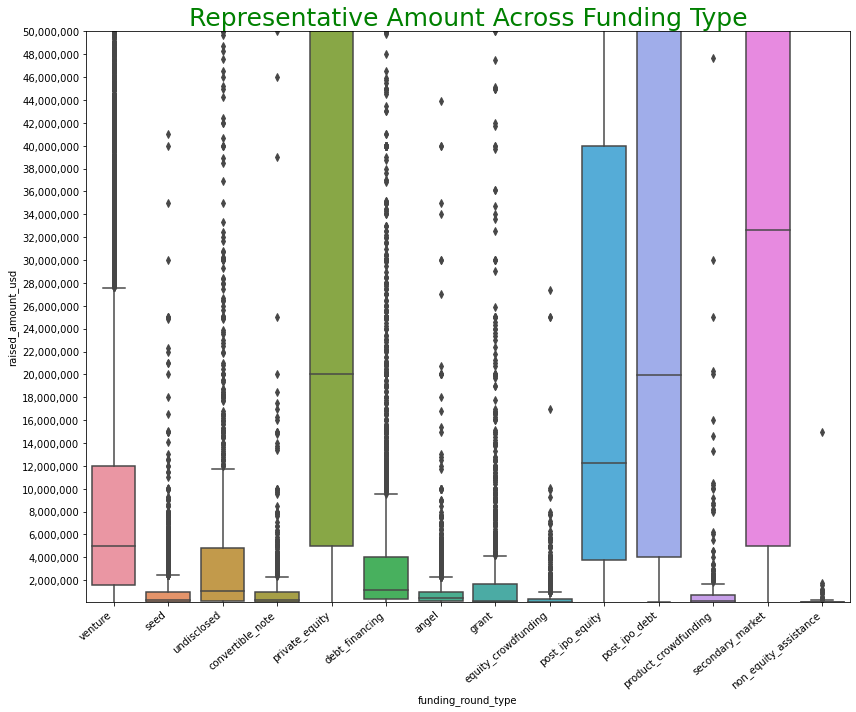

In [85]:
# Create a box-plot to show the representative amount of investment across different funding type
import matplotlib.ticker as ticker
plt.figure(figsize=(12,10))

plot = sns.boxplot(x = 'funding_round_type', y = 'raised_amount_usd', data = master_frame)
plot.set(ylim = (100000,50000000))
plot.yaxis.set_major_locator(ticker.MultipleLocator(2_000_000))           # calibrate y-axis in multiples of 1000000
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))     # To format the values on y-axis
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")        # To avoid overlapping of labels on x-axis
plt.title('Representative Amount Across Funding Type', fontdict = {'fontsize' : 25, 'color':'green'})
plt.tight_layout()


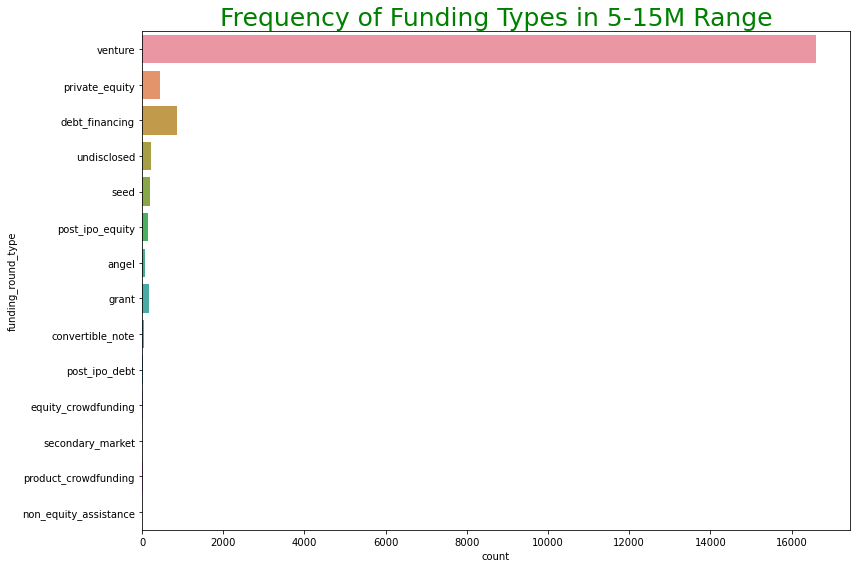

In [86]:
# To show the frequency of funding_type having the amounts in range of 5-15M
plt.figure(figsize=(12, 8))
sns.countplot(data = master_frame[(master_frame["raised_amount_usd"]>=5_000_000) &\
             (master_frame["raised_amount_usd"]<=15_000_000)], y ="funding_round_type" )
plt.title('Frequency of Funding Types in 5-15M Range', fontdict = {'fontsize' : 25, 'color':'green'})
plt.tight_layout()

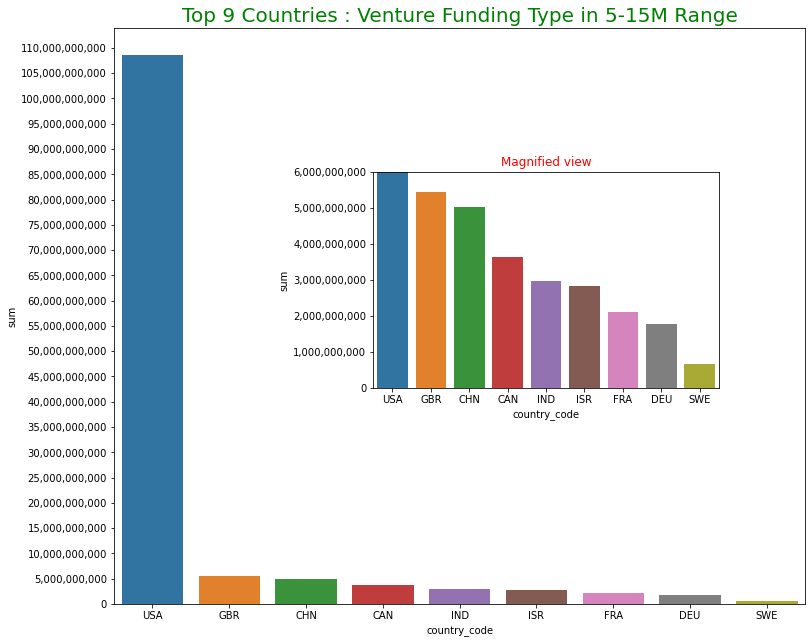

In [87]:
# Plot showing the top 9 countries in venture funding between 5-15M amount range
fig = plt.figure(figsize=(12, 10))

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.4, 0.4, 0.4, 0.3]) # inset axes

outer_plot=sns.barplot(data = venture_frame_grpd, x ="country_code", y="sum", ax = axes1 )
axes1.set_title("Top 9 Countries : Venture Funding Type in 5-15M Range", fontdict = {'fontsize' : 20, 'color':'green'})

inner_plot = sns.barplot(data = venture_frame_grpd, x ="country_code", y="sum", ax = axes2 )
inner_plot.set(ylim = (0,6000000000))
axes2.set_title("Magnified view", fontdict = {'color':'red'})

outer_plot.yaxis.set_major_locator(ticker.MultipleLocator(5_000_000_000))       # calibrate y-axis in multiples of 1000000
outer_plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))     # To format the values on y-axis
inner_plot.yaxis.set_major_locator(ticker.MultipleLocator(1_000_000_000))       # calibrate y-axis in multiples of 1000000
inner_plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))     # To format the values on y-axis


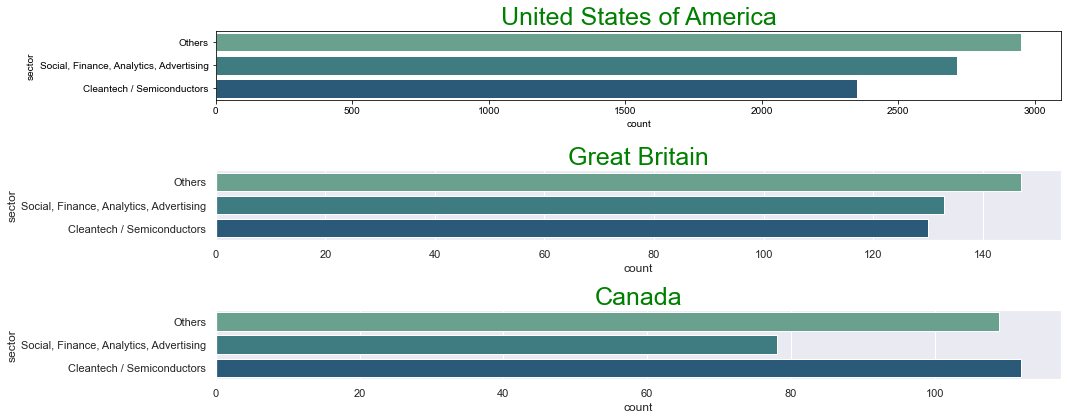

In [88]:
# Plot showing the top three sectors across top three countries for Venture funding between 5-15M range
fig = plt.figure(figsize=(15, 6))
plt.subplot(3,1,1)   # Divide the plots into three rows and one column. The follwing code is for the first graph

sns.set(style='darkgrid')
df = top_en_ven_cnt_with_sectors_filtered

sns.countplot(y="sector",  data=df[df["country_code"]=='USA'],
              palette="crest", order=df.sector.value_counts().iloc[:3].index)
plt.title('United States of America', fontdict = {'fontsize' : 25, 'color':'green'})

plt.subplot(3,1,2)     # The follwing code is for the second graph

sns.countplot(y="sector",  data=df[df["country_code"]=='GBR'],
              palette="crest", order=df.sector.value_counts().iloc[:3].index)
plt.title('Great Britain', fontdict = {'fontsize' : 25, 'color':'green'})

plt.subplot(3,1,3)     # The follwing code is for the final graph

sns.countplot(y="sector",  data=df[df["country_code"]=='CAN'],
              palette="crest", order = df.sector.value_counts().iloc[:3].index)
plt.title('Canada', fontdict = {'fontsize' : 25, 'color':'green'})
plt.tight_layout()